In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

df = pd.read_csv("../data/ch4_scores400.csv")
scores = np.array(df["score"])
df[:10]

,score
0,76
1,55
2,80
3,80
4,74
5,61
6,81
7,76
8,23
9,80


# 4.3 추측통계의 확률

전교생의 시험 점수가 어덯게 분포되어 있는지 알기 위해 계급폭을 1점으로 하여 히스토그램을 그려보자.

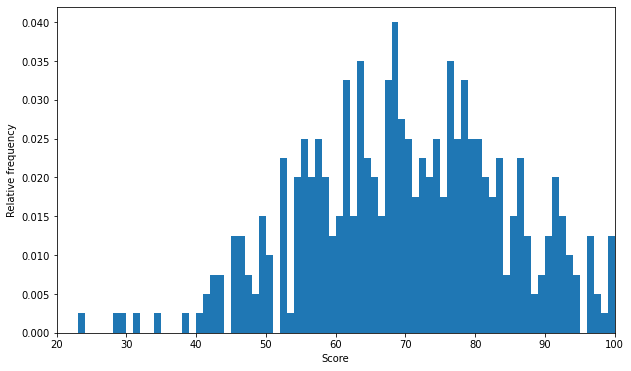

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel("Score")
ax.set_ylabel("Relative frequency")
plt.show()

위 그림을 보면, 69점을 얻은 학생은 전교생의 0.04(4%)를 차지하고 있음을 알 수 있다.
따라서 무작위추출을 수행하면 4% 확률로 69점이라는 표본 데이터를 얻게 된다.
이런 결과는 다른 저수에 관해서도 마찬가지로, 상대도수는 해당 점수를 얻는 확률에 대응한다.
결국 이 히스토그램을 모집단의 확률분포로 간주할 수 있다.

무작위 추출은 이와 같이 확률분포를 따르는 확률변수의 시행이다.

In [4]:
np.random.choice(scores) # 89가 나왔다고 가8

65

89점이라는 실현값을 얻었다. 이것은 무작위추출로 얻은 표본 데이터가 89점이었다고 해석할 수 있다.

주사위의 상대도수가 시행 횟수를 늘리면 실제 확률분포에 가까워진 것처럼, 무작위추출에서도 표본의 크기가 커지면, 표본 데이터의 상대도수는 실제의 확률분포에 가까워진다.

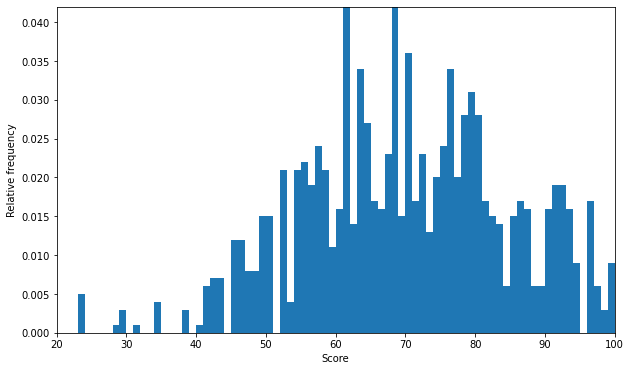

In [5]:
sample = np.random.choice(scores, 1000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel("Score")
ax.set_ylabel("Relative frequency")
plt.show()

표본 크기가 커지면, 실제의 분포에 수렴된다.

마지막으로 표본평균에 관해서 생각해보자.

표본 하나하나가 확률변수이므로, 표본들의 평균으로 계산되는 표본평균 역시 확률 변수이다.

무작위 추출로 표본 크기가 20인 표본을 추출하여 표본 평균을 계산하는 작업을 10,000번 수행해서, 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 살펴보자.

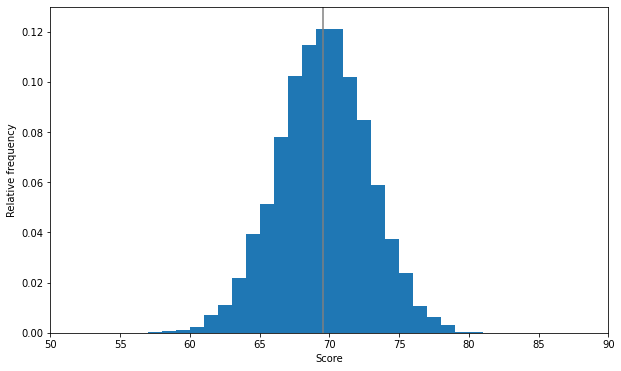

In [9]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')

ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel("Score")
ax.set_ylabel("Relative frequency")
plt.show()